#**Modulo 37 - PCA**
**Aula 3: Aplicando com Python**

Nessa aula aplicaremos o PCA afim de reduzir a dimensionalidade dos nossos dados e a base que testaremos é a base que utilizamos no módulo passado de duelo.

 A base contém 2126 registros extraídos de exames de Cardiotocograma (CTG), que são essenciais para avaliar a saúde fetal. Esses exames foram classificados em três categorias: Normal, Suspeito e Patológico.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
base = pd.read_csv('fetal_health.csv')

In [3]:
base

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


No PCA (Análise de Componentes Principais), você aplica a transformação apenas nas variáveis preditoras (as variáveis explicativas ou X). O objetivo do PCA é reduzir a dimensionalidade dos dados, mantendo o máximo de variabilidade possível nas componentes principais.

In [4]:
X = base.drop(columns=['fetal_health'])

# Vamos relembrar PCA:

As componentes principais (ou PCs) no PCA são combinações lineares das variáveis originais que capturam a maior parte da variabilidade dos dados. Em vez de olhar para cada variável individualmente, o PCA cria novas "variáveis" (as componentes) que representam os dados de forma mais compacta, concentrando o máximo de informação possível em menos dimensões. As primeiras componentes explicam a maior parte da variação nos dados, permitindo que você trabalhe com menos variáveis sem perder muita informação.

Nessa base temos 21 variáveis, vamos tentar reduzir para 10.

Em geral, o objetivo do PCA é reduzir a dimensionalidade ao mesmo tempo em que se preserva a maior parte possível da informação (variabilidade) original.

In [5]:
pca = PCA(n_components= 10 ) # Substitua pelo número de componentes que deseja
# Ajustando o PCA aos dados X
pca.fit(X)

PCA(n_components=10)

In [6]:
# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Variância explicada acumulada
cumulative_variance = explained_variance.cumsum()

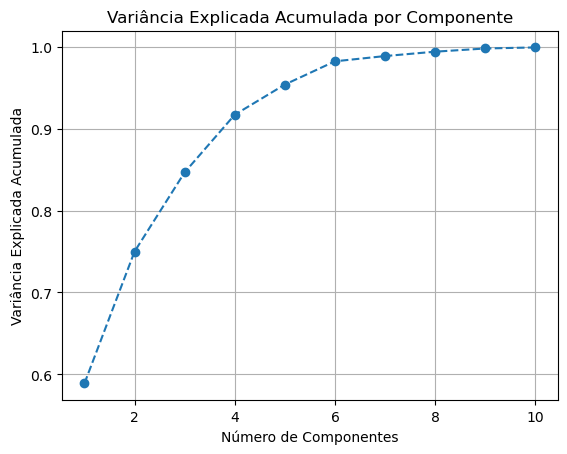

In [7]:
# Plotando a variância explicada acumulada
plt.plot(range(1, 11), cumulative_variance, marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()


**Interpretando esse gráfico:**

Eixo X (Número de Componentes): Representa o número de componentes principais que estamos considerando, de 1 até o número de componentes que especificamos (neste caso, 10).

Eixo Y (Variância Explicada Acumulada): Representa a proporção acumulada da variância total dos dados que é explicada pelas componentes principais.

Curva: A curva mostra como a variância explicada se acumula conforme você adiciona mais componentes principais.

bserve o "Joelho" da Curva: O "joelho" (ou cotovelo) da curva é o ponto onde a adição de mais componentes não resulta em um aumento significativo da variância explicada. Esse ponto é uma boa indicação de quantas componentes principais são suficientes. Nosso "joelho" ocorre antes da 10ª componente, então podemos considerar menos componentes.

Com apenas 4 componentes, estamos conseguindo capturar 90% da variabilidade dos  dados originais. Isso significa que a maioria da informação relevante nos  dados pode ser representada por essas 4 componentes.

In [8]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.58898951 0.16092694 0.09669447 0.07033572 0.03682141 0.02837084
 0.00640861 0.00534764 0.00389701 0.00129613]
[2513.26961643 1313.71052286 1018.32434732  868.50689545  628.39906528
  551.59639911  262.16046536  239.47841767  204.43303284  117.89906024]


Nosso primeiro array mostra a proporção da variância total dos dados que é explicada por cada uma das componentes principais.

O segundo array contém os valores singulares associados a cada componente principal, que seriam a magnitude da variância explicada por cada componente.
Meio que indicam a "força" da componente no nosso modelo.

Vamos avaliar juntos a primeira componente:

Primeira Componente (0.5889): A primeira componente principal captura aproximadamente 58,9% da variância total dos dados. Isso significa que quase 60% da informação original está concentrada nessa única componente.


Primeira Componente (2513.27): Este valor singular elevado reflete a grande quantidade de variância capturada pela primeira componente.


**Vamos agora refazer nosso PCA com apenas 4 componentes:**

In [9]:
pca_4 = PCA(n_components= 4 )
pca_4.fit(X)

PCA(n_components=4)

In [10]:
explained_variance = pca_4.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

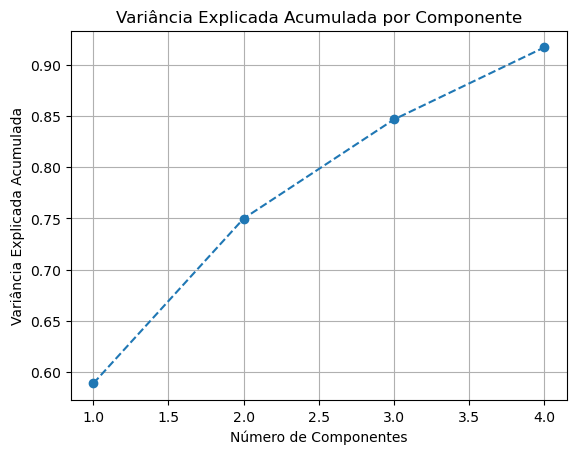

In [11]:
plt.plot(range(1, 5), cumulative_variance, marker='o', linestyle='--') ##ALTERAR O RANGE
plt.title('Variância Explicada Acumulada por Componente')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

# Contrução do modelo aplicando PCA:

In [12]:
Y = base['fetal_health']

In [13]:
X_pca = pca.fit_transform(X)

In [14]:
X_pca

array([[ 2.09355875e+01,  4.46359666e+01,  4.42632927e+01, ...,
         1.74898513e+01, -1.33251804e+01, -9.92261592e+00],
       [ 6.18205499e+01, -3.03286707e+01, -2.98880467e+01, ...,
        -3.48510523e+00, -1.32675300e-01, -2.69024440e-01],
       [ 6.25581101e+01, -2.91362827e+01, -2.95872141e+01, ...,
        -3.12835798e+00,  2.81959718e+00, -1.28175753e+00],
       ...,
       [-2.15768651e+01, -2.67054022e+01,  5.22313027e+00, ...,
         3.28487276e+00,  4.09162157e-03, -8.58893020e-02],
       [-2.31941746e+01, -2.47358012e+01,  6.67931316e+00, ...,
         3.38978224e+00,  8.25739810e-01,  1.16219485e-01],
       [-4.95509848e+01, -8.41590488e+00,  1.28126666e+01, ...,
        -7.29034286e-01, -3.41300569e-02, -1.19228019e+00]])

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

In [16]:
rf_model = RandomForestClassifier(random_state=42)

In [17]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [18]:
Y_pred = rf_model.predict(X_test)

In [19]:
print("Matriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred))

print("\nRelatório de Classificação:")
print(classification_report(Y_test, Y_pred))

Matriz de Confusão:
[[477  17   2]
 [ 36  62   3]
 [  4   4  33]]

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.92      0.96      0.94       496
         2.0       0.75      0.61      0.67       101
         3.0       0.87      0.80      0.84        41

    accuracy                           0.90       638
   macro avg       0.85      0.79      0.82       638
weighted avg       0.89      0.90      0.89       638

